In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import preprocessing as pp

## Using thesaurus' semantic related words

In [5]:
msr_data = pd.read_csv('data/msr_dataset.csv', encoding = 'ANSI')
msr_data['processed_token'] = pp.preprocess_tokens(msr_data)
y_msr = msr_data['class']
msr = msr_data.drop(columns=['class'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(msr, y_msr, train_size=0.8, 
                                                    random_state=33, shuffle=True)

msr_vectorizer = CountVectorizer()

bow_train = msr_vectorizer.fit_transform(X_train['processed_token'])
sparse_matrix_train = pd.DataFrame(bow_train.toarray(), columns = msr_vectorizer.get_feature_names())
#X_train_count = pp.concat_loc_sum(sparse_matrix_train, X_train)
sparse_matrix_train = sparse_matrix_train.to_sparse()

bow_test = msr_vectorizer.transform(X_test['processed_token'])
sparse_matrix_test = pd.DataFrame(bow_test.toarray(), columns = msr_vectorizer.get_feature_names())
#X_test_count = pp.concat_loc_sum(sparse_matrix_test, X_test)
sparse_matrix_test = sparse_matrix_test.to_sparse()

msr_model = MultinomialNB()
msr_model.fit(sparse_matrix_train, y_train)
preds = msr_model.predict(sparse_matrix_test)

print(classification_report(y_test, preds))

c:\users\aian\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: DataFrame.to_sparse is deprecated and will be removed in a future version
  if __name__ == '__main__':
c:\users\aian\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: DataFrame.to_sparse is deprecated and will be removed in a future version
  
c:\users\aian\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3456: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  return klass(values, index=self.index, name=items, fastpath=True)
c:\users\aian\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3456: FutureWarning: SparseSeries is deprecated and will be removed in a 

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       283
           1       0.90      0.90      0.90       278

    accuracy                           0.90       561
   macro avg       0.90      0.90      0.90       561
weighted avg       0.90      0.90      0.90       561



In [8]:
print(len(msr_vectorizer.get_feature_names()))

23327


In [12]:
msr_data['token'][333]

"'context  get  class  get  resource  css  test  folder  test  expected  expected  folder  get  file  get  config  url  test  from  folder  set  ignore  missing  resources  get  wro  test  utils  compare  from  different  folders  by  extension  css  import  victim  context  getclass  getresource  css  testfolder  test  expected  expectedfolder  getfile  getconfig  url  testfromfolder  setignoremissingresources  get  wrotestutils  comparefromdifferentfoldersbyextension  cssimport  victim'"

In [13]:
msr_data['processed_token'][333]

"'context gets classa clases gets resourcex rescource resourcce resources resourcse csss tests foolder folderd forlder tests expeceted exprected expectedd exspected exppected expeceted exprected expectedd exspected exppected foolder folderd forlder gets filei gets congfig config# configs urlt tests from foolder folderd forlder sett ingnore ignor ignores mmissing missings misssing missinng resources gets wro tests utils compared comparet compaire compares from different folders by extensioin extenision externsion extenssion exetension extensiosn extendion extesnsion extention exntension enxtension extensions extensiion extenstion extentsion extensione exstension csss imprort imports importo victim context getclazz getclasses getclassb getclassa getclassc getressource getresourceset getresouces getresourse getresources getresouce csss test folders tests folder testfolders test folder tests expeceted exprected expectedd exspected exppected expectedfolder getfile getconf getconfigs urlt te

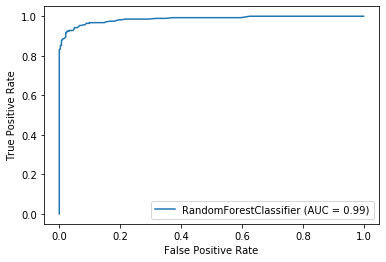

In [9]:
roc = plot_roc_curve(msr_model, sparse_matrix_test, y_test)

In [10]:
importances = pd.DataFrame(msr_model.feature_importances_, index = sparse_matrix_train.columns,
                            columns=['importance']).sort_values('importance', ascending=False)

importances[:15]

,importance
actions,0.013986
jobf,0.013062
tabele,0.011908
coord,0.010971
services,0.010861
actioin,0.009654
anction,0.008847
oozies,0.008578
clusterf,0.007593
ooozie,0.006960


Text(0, 0.5, 'Token')

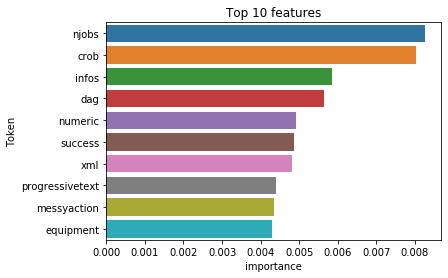

In [33]:
sns.barplot(y=importances.index[:10], x=importances['importance'][:10])
plt.title('Top 10 features')
plt.ylabel('Token')

### Evaluating MSR model on new data

In [9]:
new_data = pd.read_csv('data/new_dataset.csv')
new_data['processed_token'] = pp.preprocess_tokens(new_data)
y_new = new_data['class']
new_data = new_data.drop(columns=['class'])

In [10]:
X_new = msr_vectorizer.transform(new_data['processed_token'])
sparse_matrix_new = pd.DataFrame(X_new.toarray(), columns = msr_vectorizer.get_feature_names())
sparse_matrix_new = sparse_matrix_new.to_sparse()
#X_new_count = pp.concat_loc_sum(sparse_matrix_new, new_data)

new_preds = msr_model.predict(sparse_matrix_new)
print(classification_report(y_new, new_preds))

c:\users\aian\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: DataFrame.to_sparse is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\aian\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3456: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  return klass(values, index=self.index, name=items, fastpath=True)


              precision    recall  f1-score   support

           0       0.63      0.48      0.54       724
           1       0.59      0.72      0.64       737

    accuracy                           0.60      1461
   macro avg       0.61      0.60      0.59      1461
weighted avg       0.61      0.60      0.60      1461



## Using thesaurus synonims

In [18]:
msr_data = pd.read_csv('data/msr_dataset.csv', encoding = 'ANSI')
msr_data['processed_token'] = pp.preprocess_tokens(msr_data, synset_option=1)
y_msr = msr_data['class']
msr = msr_data.drop(columns=['class'])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(msr, y_msr, train_size=0.8, 
                                                    random_state=33, shuffle=True)

msr_vectorizer = CountVectorizer()

bow_train = msr_vectorizer.fit_transform(X_train['processed_token'])
sparse_matrix_train = pd.DataFrame(bow_train.toarray(), columns = msr_vectorizer.get_feature_names())
X_train_count = pp.concat_loc_sum(sparse_matrix_train, X_train)

bow_test = msr_vectorizer.transform(X_test['processed_token'])
sparse_matrix_test = pd.DataFrame(bow_test.toarray(), columns = msr_vectorizer.get_feature_names())
X_test_count = pp.concat_loc_sum(sparse_matrix_test, X_test)

msr_model = RandomForestClassifier(random_state=33)
msr_model.fit(X_train_count, y_train)
preds = msr_model.predict(X_test_count)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       283
           1       0.97      0.91      0.94       278

    accuracy                           0.94       561
   macro avg       0.95      0.94      0.94       561
weighted avg       0.95      0.94      0.94       561



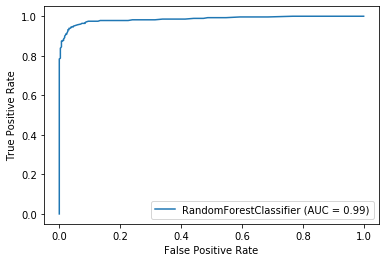

In [20]:
roc = plot_roc_curve(msr_model, X_test_count, y_test)

In [21]:
importances = pd.DataFrame(msr_model.feature_importances_, index = X_train_count.columns,
                            columns=['importance']).sort_values('importance', ascending=False)

importances[:15]

,importance
services,0.014499
jobf,0.012866
tabele,0.011417
loc,0.008101
anction,0.007904
actions,0.007840
coord,0.006929
clustera,0.006501
oozies,0.006274
getiid,0.005965


Text(0, 0.5, 'Token')

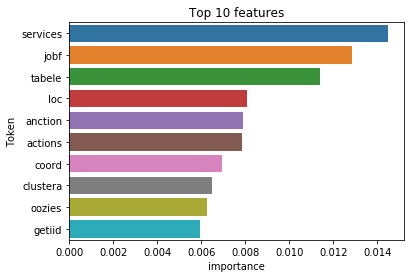

In [22]:
sns.barplot(y=importances.index[:10], x=importances['importance'][:10])
plt.title('Top 10 features')
plt.ylabel('Token')

### Evaluating MSR model on new data

In [23]:
new_data = pd.read_csv('data/new_dataset.csv')
new_data['processed_token'] = pp.preprocess_tokens(new_data, synset_option=1)
y_new = new_data['class']
new_data = new_data.drop(columns=['class'])

In [24]:
X_new = msr_vectorizer.transform(new_data['processed_token'])
sparse_matrix_new = pd.DataFrame(X_new.toarray(), columns = msr_vectorizer.get_feature_names())
X_new_count = pp.concat_loc_sum(sparse_matrix_new, new_data)

new_preds = msr_model.predict(X_new_count)
print(classification_report(y_new, new_preds))

              precision    recall  f1-score   support

           0       0.50      0.98      0.67       724
           1       0.74      0.06      0.11       737

    accuracy                           0.51      1461
   macro avg       0.62      0.52      0.39      1461
weighted avg       0.62      0.51      0.38      1461

